In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline

In [3]:
def Perceptronfunk(xi,omega):
    """Returns the signum function of the skalar product of point xi and omega."""
    return np.sign(np.sum(xi[:]*omega[:]))

def PerceptronLearning(xi,yi,omega,n,l,t=0):
    """Calculates Algorithm 1 from the lecture notes. Stops also if 500k iterations are reached.
    
    Parameter:
    ----------
    xi : np.array(l,n+1)
        Data points, the last n+1 is filled with ones
        
    yi : np.array(l)
        labels of xi
    
    omega : np.array(n+1)
        The random starting weight vector, the last n+1 is the value of theta
    
    n : int
        dimensions
    
    l : int
        amount of data points
    
    ----------
    Returns:
    omega : np.array(n+1)
        calculated weight vector
        
    t : int
        how many loops where done
    """
    counter = 1
    emergencyStop = 0
    while counter!=0 and emergencyStop<50000:
        emergencyStop += 1
        counter = 0
        t+=1
        for index in range(l):
            if yi[index] == 1 and Perceptronfunk(xi[index,:],omega) == -1:
                counter = 1
                omega += xi[index]
            elif yi[index] == -1 and Perceptronfunk(xi[index,:],omega) == 1:
                counter = 1
                omega -= xi[index]       
    return omega,t*l

In [4]:
n           = 2
l           = 10
omegaT      = np.random.random(n+1) # True Hyperplane; omegaT[-1] = theta
omega       = np.random.random(n+1) # random starting plane
xi          = np.random.random((l,n+1))
xi[:,-1]    = 1
omegaT[-1] *=-1   #-np.dot(omegaT[:-2],xi[1,:1])
yi          = np.zeros(l)

for i in range(l):
    yi[i] = Perceptronfunk(xi[i],omegaT)
    
#print (omegaT)
print (yi)
#print (xi)

[-1.  1.  1. -1.  1. -1. -1. -1. -1. -1.]


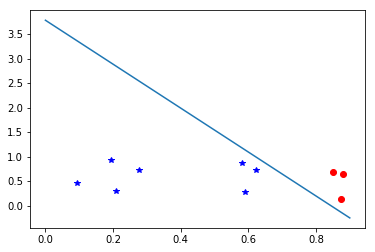

In [5]:
#true plot of 2D "hyperplane"
#mostly copy from Luzie
x=np.arange(0,1,0.1)
plt.figure()
index1=[i for i,e in enumerate(yi) if e==1]
indexmin1=[i for i,d in enumerate(yi) if d==-1]
plt.plot(xi[index1,0],xi[index1,1],'ro')
plt.plot(xi[indexmin1,0],xi[indexmin1,1],'b*')
plt.plot(x,-(omegaT[2]+omegaT[0]*x[:])/omegaT[1]) # mit -omegaT[2], weil es als -theta definiert ist
plt.show()

In [6]:
omega,t = PerceptronLearning(xi,yi,omega,n,l)
#print (omega,omegaT)

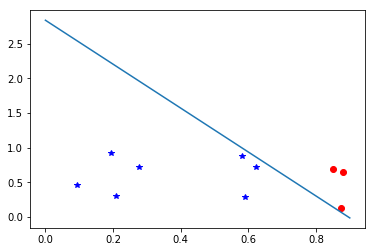

In [7]:
#calculated plot of 2D "hyperplane"
#mostly copy from Luzie
x=np.arange(0,1,0.1)
plt.figure()
index1=[i for i,e in enumerate(yi) if e==1]
indexmin1=[i for i,d in enumerate(yi) if d==-1]
plt.plot(xi[index1,0],xi[index1,1],'ro')
plt.plot(xi[indexmin1,0],xi[indexmin1,1],'b*')
plt.plot(x,-(omega[2]+omega[0]*x[:])/omega[1]) # mit -omegaT[2], weil es als -theta definiert ist
plt.show()

# 1(a)

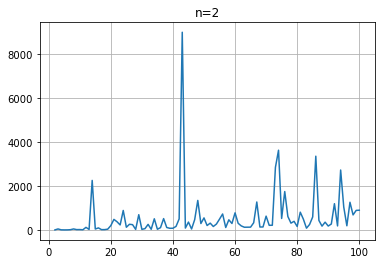

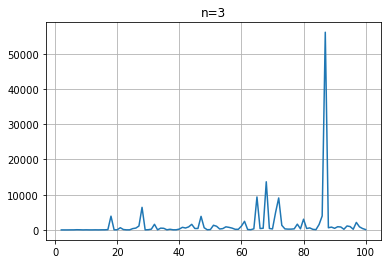

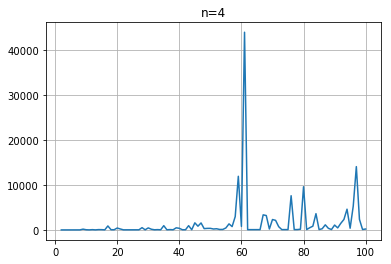

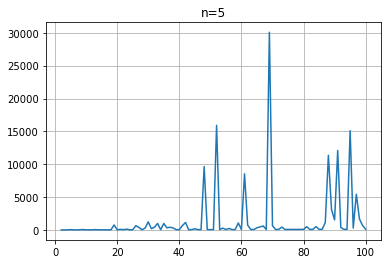

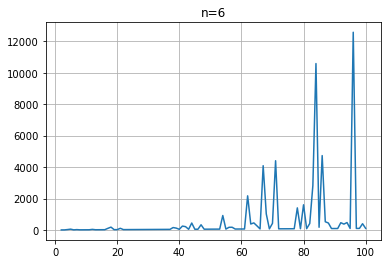

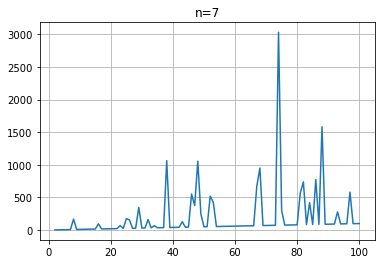

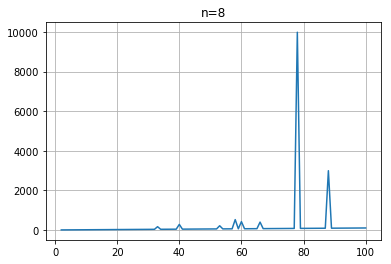

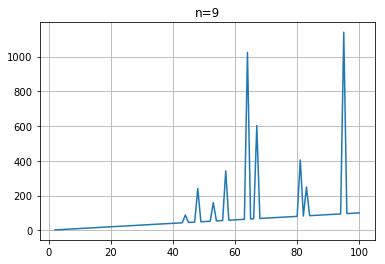

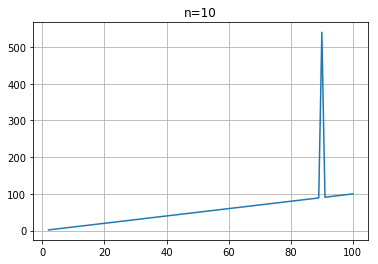

In [8]:
#plots n=2..10, l=2..100

for n in np.arange(2,11):
    t = np.zeros((2,99))
    plt.figure()
    plt.title('n={}'.format(n))
    for l in range(2,101):
        omegaT      = np.random.random(n+1)    # True Hyperplane; omegaT[-1] = theta
        omega       = np.random.random(n+1)    # random starting plane
        xi          = np.random.random((l,n+1))
        xi[:,-1]    = 1
        omegaT[-1] *=-1                        #-np.dot(omegaT[:-2],xi[1,:1])
        yi          = np.zeros(l)
        for i in range(l):
            yi[i] = Perceptronfunk(xi[i],omegaT)
            
        omega,t[1,l-2] = PerceptronLearning(xi,yi,omega,n,l)
        t[0,l-2]    = l
    plt.plot(t[0],t[1])
    plt.grid()
    plt.show()